<a href="https://colab.research.google.com/github/vd4mmind/googleColab/blob/master/testRKernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This notebook is a test one to figure out how I can play with R in Google Colab
# I found this trick to apply the same here (https://stackoverflow.com/questions/54595285/how-to-use-r-with-google-colaboratory)
# Pretty interesting to see how I can use R in Colab notebook. I interestingly have been playing with python in colab but this is my first stint with R in Colab
# Here is how I am able to use R in Colab.
# I just replicated the notebook with "R Kernel" from this link (https://colab.research.google.com/notebook#create=true&language=r)
# loaded the required libraries and tried my hand in some short packages I intend to work on my free time. 
# This is not a very well prepared notebook as it is intending for testing the potential at my end with some available resources and what techinical roadblocks I can hit
library(IRdisplay)
library(IRkernel)

In [1]:
#Interestingly I put the sessionInfo() early as my excitement had no bounds to check out the R version and the platform I am working with
# In the tweet dated Dec 19(https://twitter.com/ivivek87/status/1207550463572369413), 2019 my R version was 3.6.1 and now I see its 3.6.2. 
# How cool is that?

sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.6.2  IRdisplay_0.7.0 pbdZMQ_0.3-3    tools_3.6.2    
 [5] htmltools_0.4.0 pillar_1.4.2    base64enc_0.1-3 crayon_1.3.4   
 [9] Rcpp_1.0.3      uuid_0.1-2      IRkernel_1.1    jsonlite_1.6   
[13] digest_0.6.23   repr_1.0.2      rlang_0.

#Testing the code for mixOmics in GoogleColab 
 You all must be familiar with this amazing suite of tools from mixOmics (http://www.bioconductor.org/packages/release/bioc/html/mixOmics.html). It is one of the pretty amazing Omics integration suite I have come across. I am just trying and testing some of its modules in this notebook to see how this work. 
 Vignettes: http://www.bioconductor.org/packages/release/bioc/vignettes/mixOmics/inst/doc/vignette.html
 
 Bookdown version: https://mixomicsteam.github.io/Bookdown/

In [2]:
#Installing the package via "Bioconductor" 
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("mixOmics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'BiocVersion', 'mixOmics'

also installing the dependencies ‘RcppEigen’, ‘RSpectra’, ‘igraph’, ‘ellipse’, ‘corpcor’, ‘matrixStats’, ‘rARPACK’, ‘gridExtra’


Old packages: 'BH', 'broom', 'curl', 'DBI', 'DT', 'mime', 'rprojroot', 'vctrs',
  'xtable', 'foreign'



In [3]:
#Instantiating the library load
library("mixOmics")

Loading required package: MASS

Loading required package: lattice

Loading required package: ggplot2


Loaded mixOmics 6.10.6
Thank you for using mixOmics!
Tutorials: http://mixomics.org
Bookdown vignette: https://mixomicsteam.github.io/Bookdown
Questions, issues: Follow the prompts at http://mixomics.org/contact-us
Cite us:  citation('mixOmics')




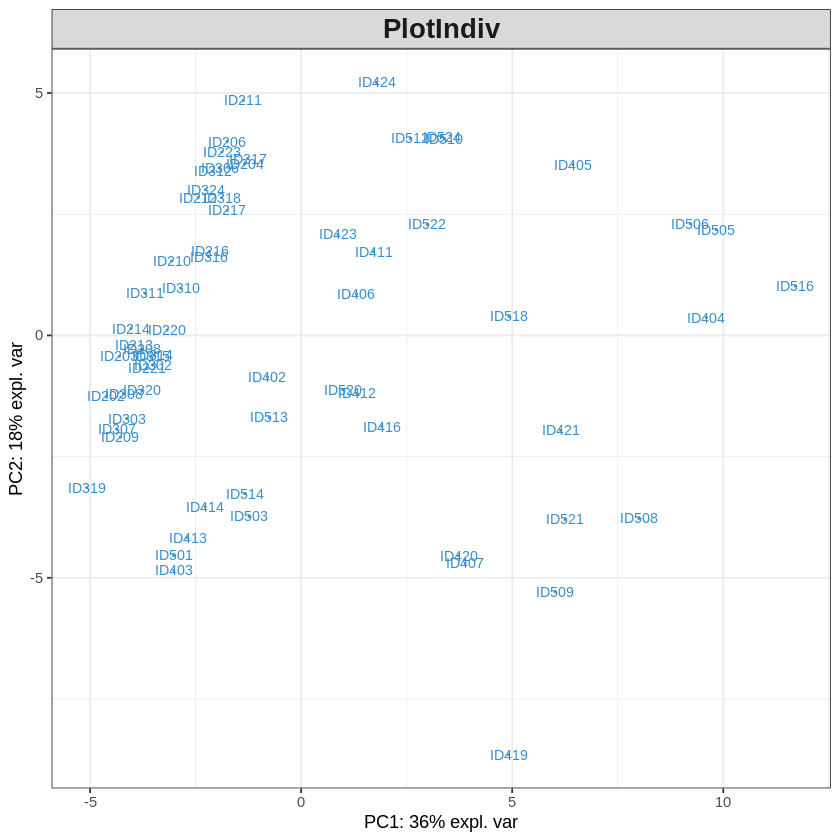

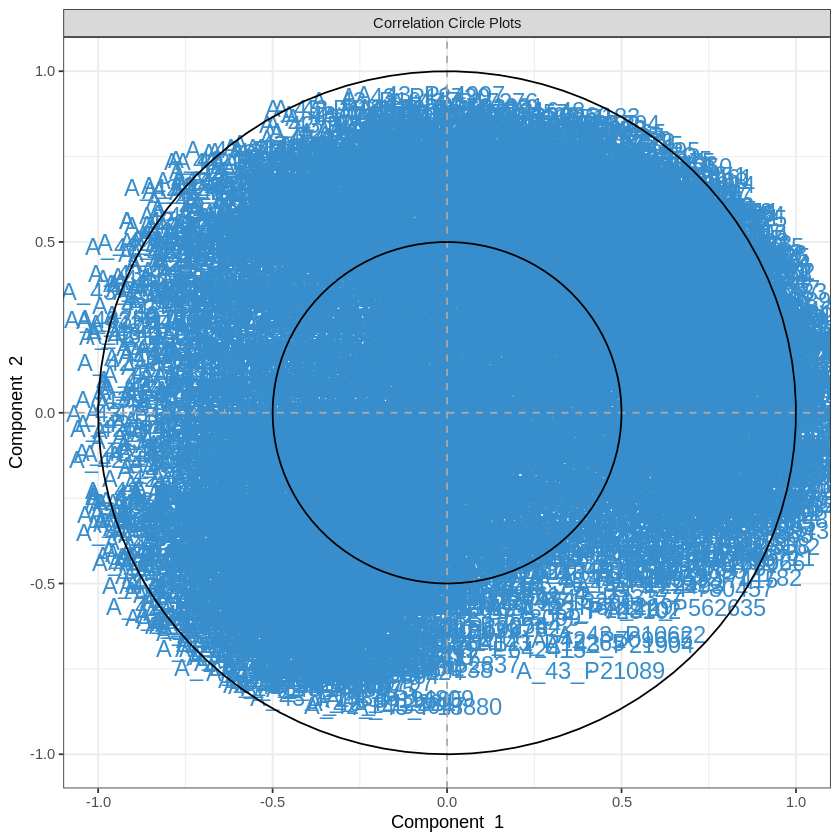

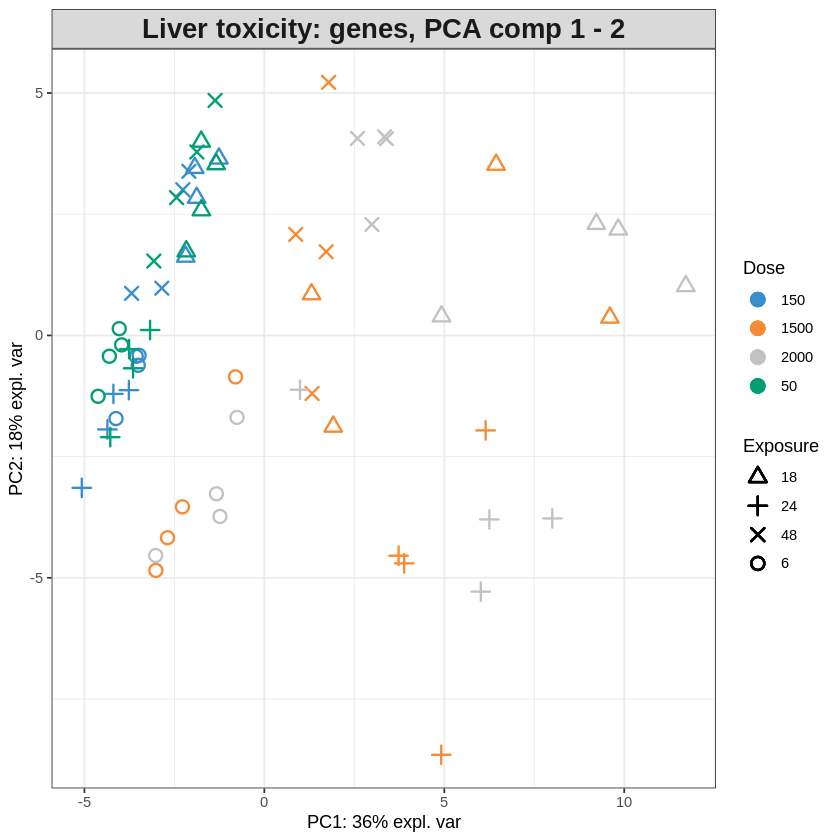

Eigenvalues for the first 5 principal components, see object$sdev^2: 
      PC1       PC2       PC3       PC4       PC5 
17.971416  9.079234  4.567709  3.204383  1.956799 

Proportion of explained variance for the first 5 principal components, see object$explained_variance: 
       PC1        PC2        PC3        PC4        PC5 
0.35684128 0.18027769 0.09069665 0.06362638 0.03885429 

Cumulative proportion explained variance for the first 5 principal components, see object$cum.var: 
      PC1       PC2       PC3       PC4       PC5 
0.3568413 0.5371190 0.6278156 0.6914420 0.7302963 

 Other available components: 
 -------------------- 
 loading vectors: see object$rotation 

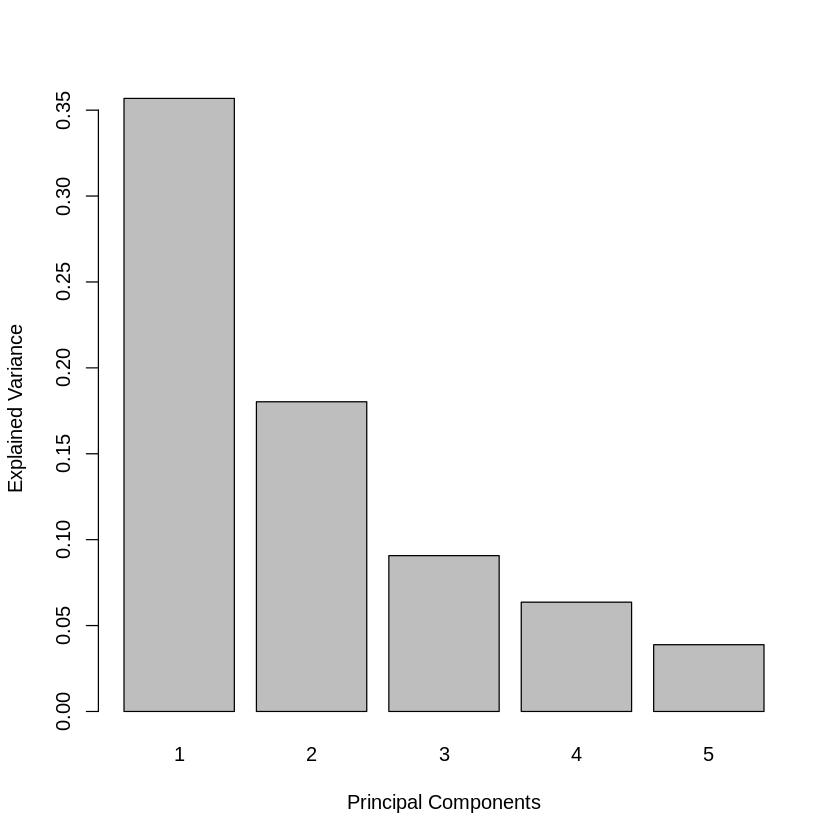

In [14]:
#Trying to replicate the vignette snippets of Liver Toxicity in Google Colab
data(liver.toxicity)
X <- liver.toxicity$gene
MyResult.pca <- pca(X,ncomp = 5)     # 1 Run the method
plotIndiv(MyResult.pca)    # 2 Plot the samples
plotVar(MyResult.pca)      # 3 Plot the variables
plotIndiv(MyResult.pca, ind.names = FALSE,
          group = liver.toxicity$treatment$Dose.Group,
          pch = as.factor(liver.toxicity$treatment$Time.Group),
          legend = TRUE, title = 'Liver toxicity: genes, PCA comp 1 - 2',
          legend.title = 'Dose', legend.title.pch = 'Exposure')
plot(MyResult.pca)
MyResult.pca

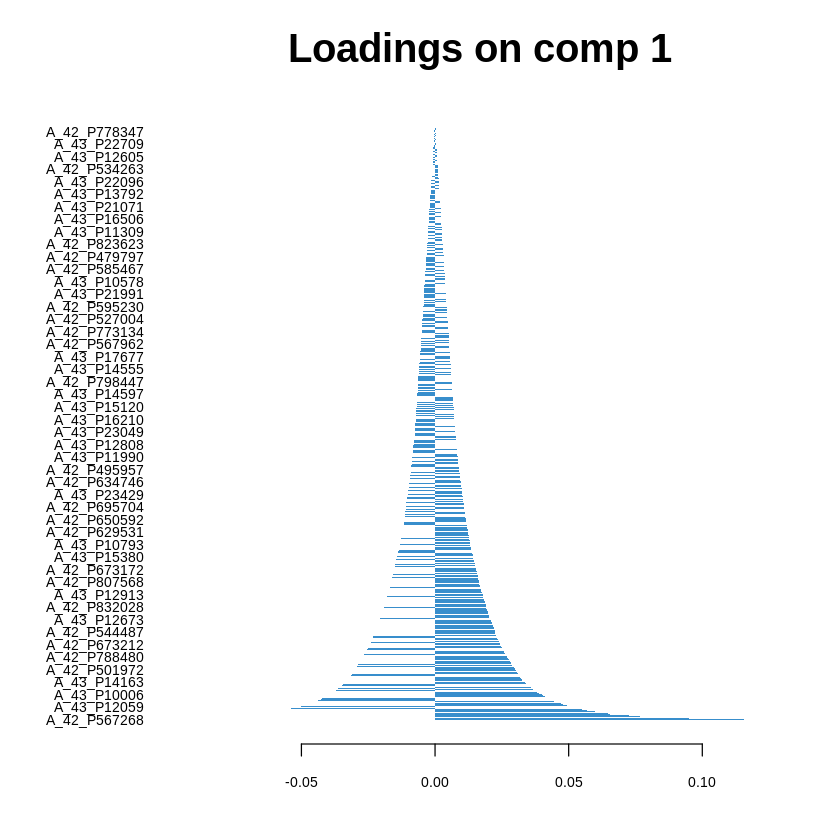

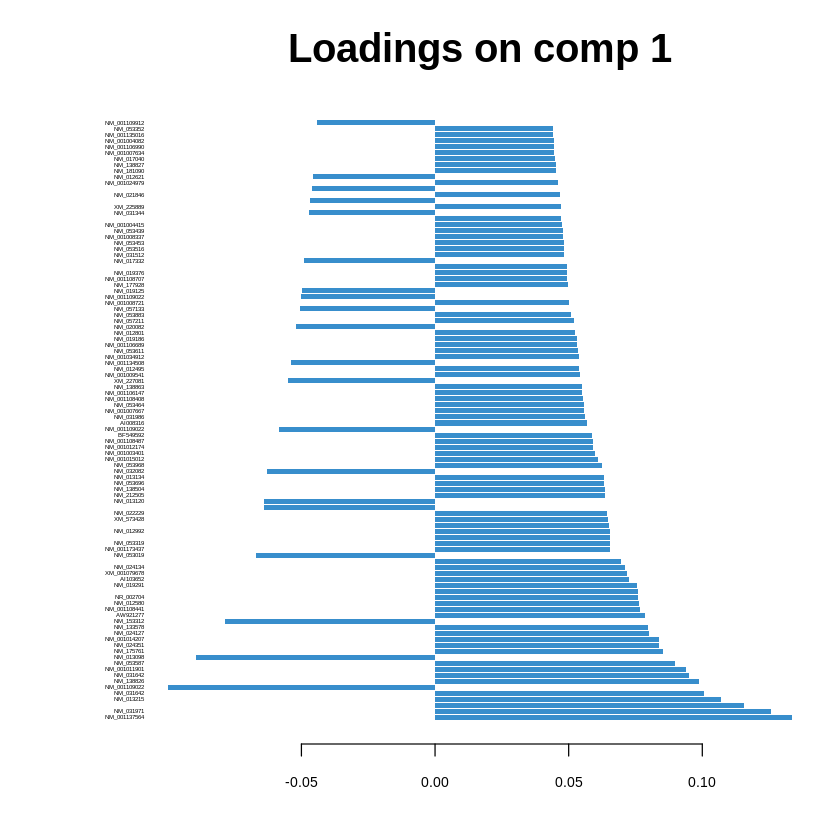

In [17]:
# a minimal example
plotLoadings(MyResult.pca)
# a customized example to only show the top 100 genes 
# and their gene name
plotLoadings(MyResult.pca, ndisplay = 100, 
             name.var = liver.toxicity$gene.ID[, "geneBank"],
             size.name = rel(0.3))

EWS  BL  NB RMS 
 23   8  12  20

[1]   63 2308

[1] 63

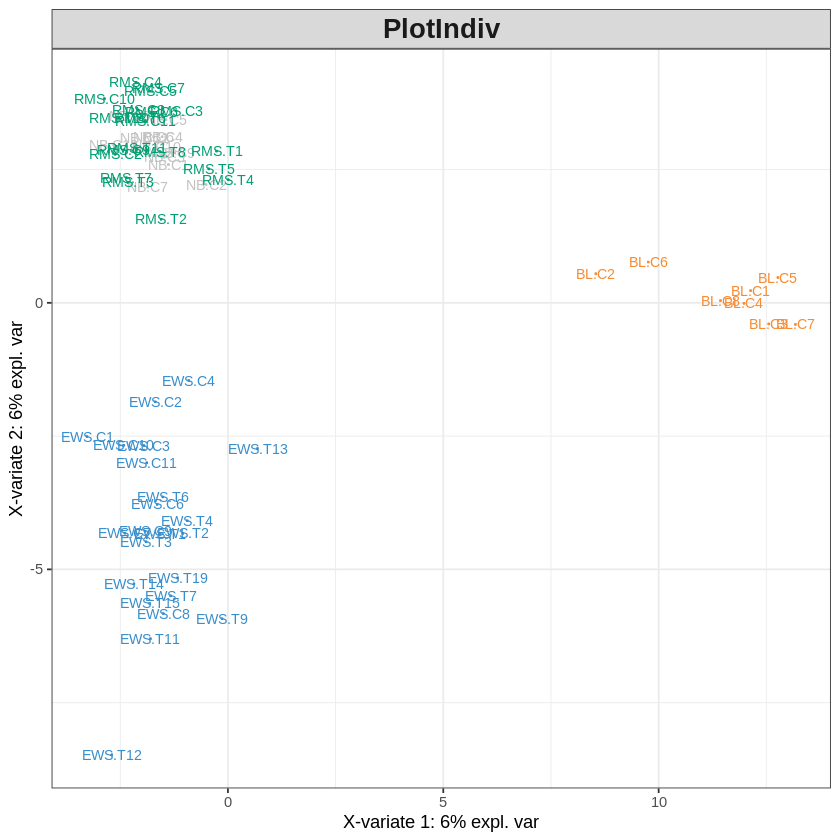

[1] "g123"  "g846"  "g758"  "g836"  "g1606" "g335"  "g783"  "g1386" "g1884"
[10] "g585"  "g589"  "g1158" "g1387" "g165"  "g1036" "g1295" "g1375" "g1116"
[19] "g1916" "g74"   "g85"   "g1099" "g1974" "g998"  "g1067" "g1839" "g1915"
[28] "g1453" "g1536" "g1279" "g1735" "g555"  "g276"  "g780"  "g188"  "g2186"
[37] "g190"  "g1443" "g2127" "g1090" "g1587" "g166"  "g1283" "g1206" "g2279"
[46] "g2116" "g2230" "g1008" "g849"  "g1042"

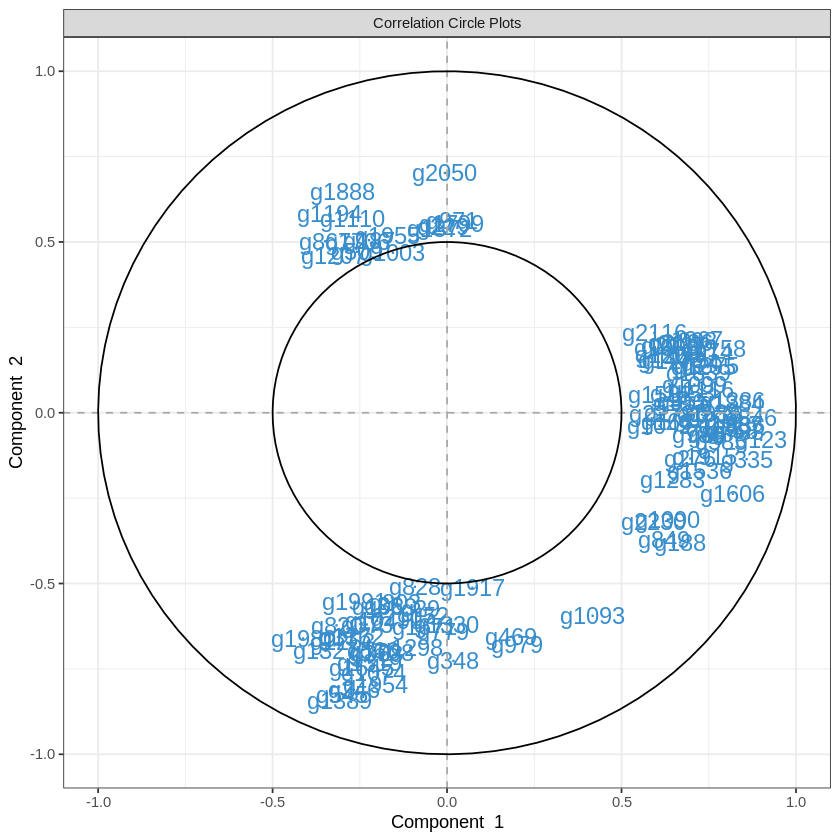

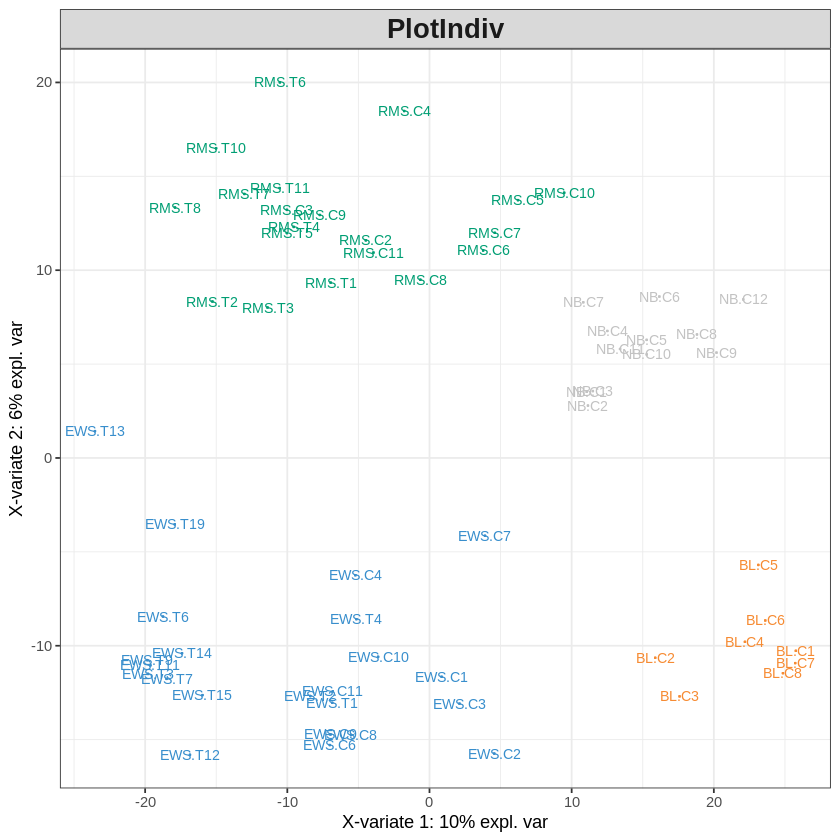

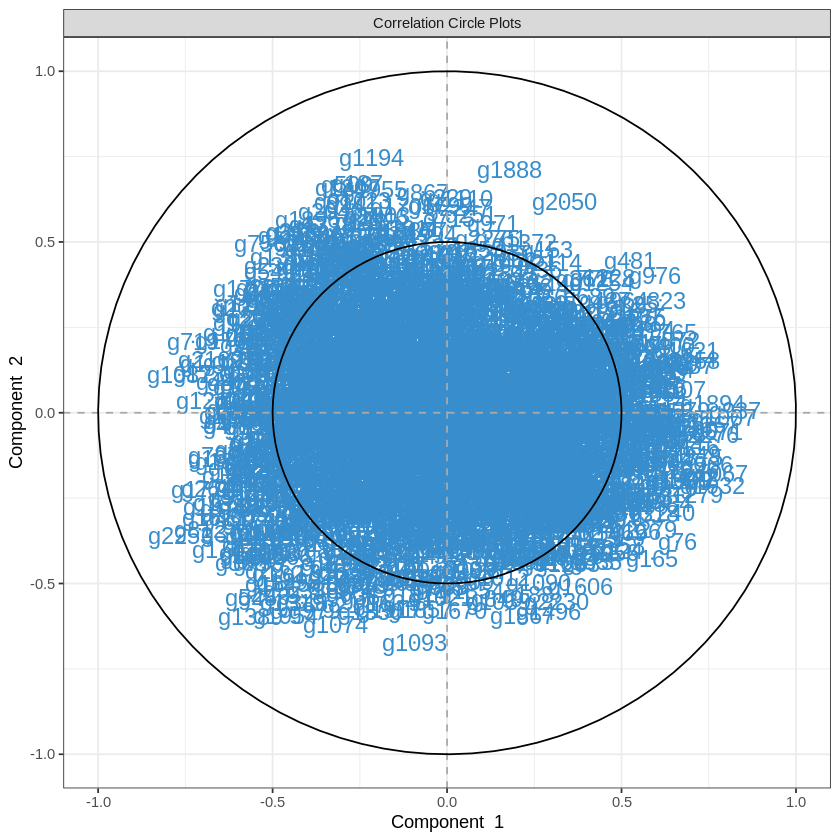

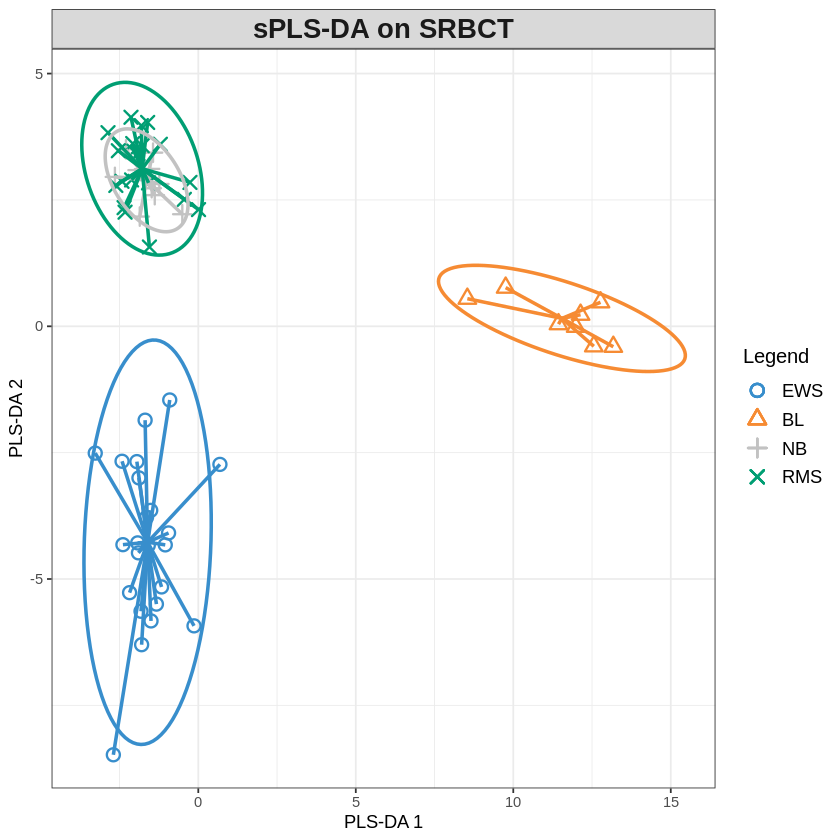

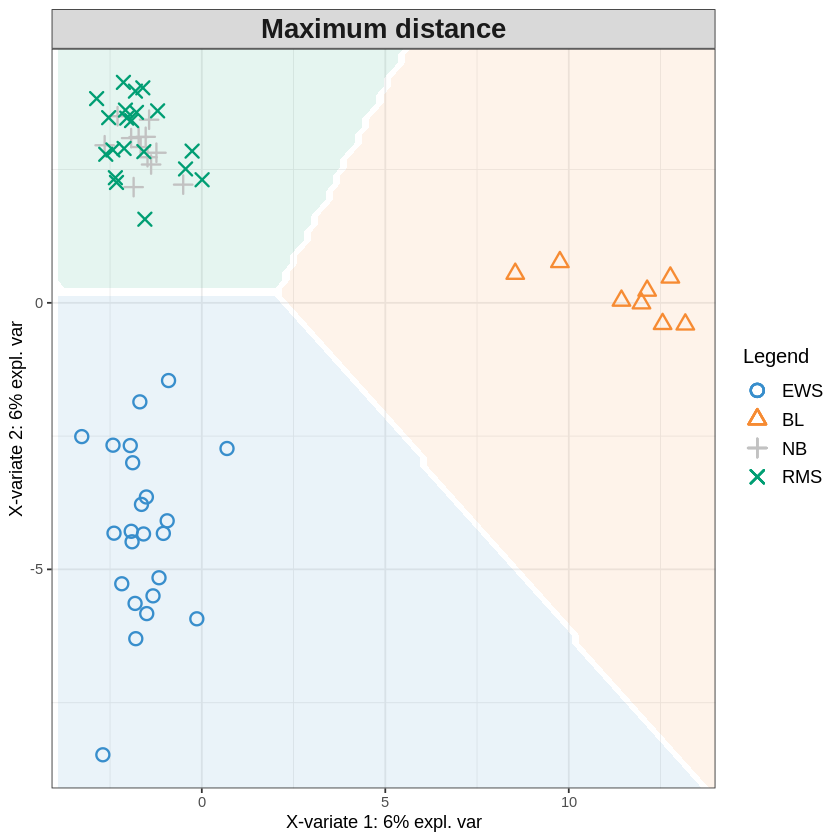

$Comp1
                   AUC   p-value
EWS vs Other(s) 0.5576 4.493e-01
BL vs Other(s)  1.0000 5.586e-06
NB vs Other(s)  0.5180 8.473e-01
RMS vs Other(s) 0.6814 2.125e-02

$Comp2
                   AUC   p-value
EWS vs Other(s) 1.0000 5.135e-11
BL vs Other(s)  1.0000 5.586e-06
NB vs Other(s)  0.7549 6.323e-03
RMS vs Other(s) 0.8953 5.159e-07



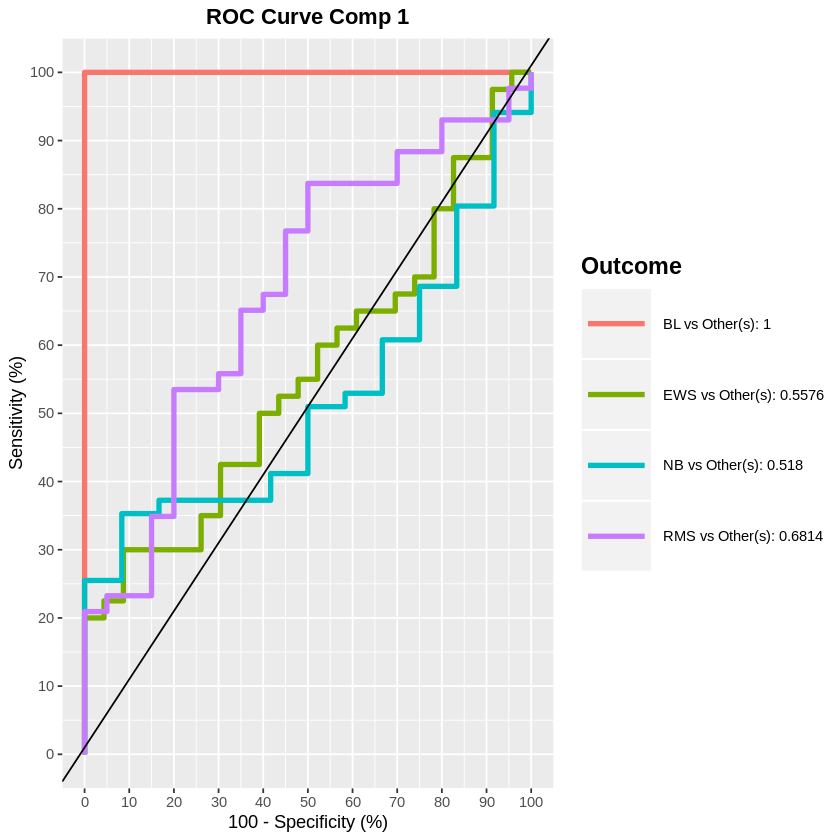

In [4]:
#Focusing on  sparse PLS-DA
# Analyzing a single omics dataset for classifying samples into known groups and new if any.
# Dataset info: "The data are directly available in a processed and normalised format from the package. The Small Round Blue Cell Tumours (SRBCT) dataset from (Khan et al. 2001) includes the expression levels of 2,308 genes measured on 63 samples. The samples are classified into four classes as follows: 8 Burkitt Lymphoma (BL), 23 Ewing Sarcoma (EWS), 12 neuroblastoma (NB), and 20 rhabdomyosarcoma (RMS)."

data(srbct)
X <- srbct$gene
Y <- srbct$class 
summary(Y)
dim(X); length(Y)
MyResult.splsda <- splsda(X, Y, keepX = c(50,50)) # 1 Run the method
plotIndiv(MyResult.splsda)                          # 2 Plot the samples
plotVar(MyResult.splsda)                            # 3 Plot the variables
selectVar(MyResult.splsda, comp=1)$name             # Selected variables on component 1
MyResult.plsda <- plsda(X,Y) # 1 Run the method
plotIndiv(MyResult.plsda)    # 2 Plot the samples
plotVar(MyResult.plsda)      # 3 Plot the variables
plotIndiv(MyResult.splsda, ind.names = FALSE, legend=TRUE,
          ellipse = TRUE, star = TRUE, title = 'sPLS-DA on SRBCT',
          X.label = 'PLS-DA 1', Y.label = 'PLS-DA 2')
background <- background.predict(MyResult.splsda, comp.predicted=2,
                                dist = "max.dist") 
plotIndiv(MyResult.splsda, comp = 1:2, group = srbct$class,
          ind.names = FALSE, title = "Maximum distance",
          legend = TRUE,  background = background)
auc.plsda <- auroc(MyResult.splsda)



Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'rgl'

also installing the dependencies ‘miniUI’, ‘webshot’, ‘manipulateWidget’


Old packages: 'BH', 'broom', 'curl', 'DBI', 'DT', 'mime', 'rprojroot', 'vctrs',
  'xtable', 'foreign'

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”
Warning message:
“'rgl_init' failed, running with rgl.useNULL = TRUE”


,value.var
,<dbl>
g123,0.53516982
g846,0.41271455
g335,0.30309695
g1606,0.30194141
g836,0.29365241
g783,0.26329876
g758,0.25826903
g1386,0.23702577
g1158,0.15283961


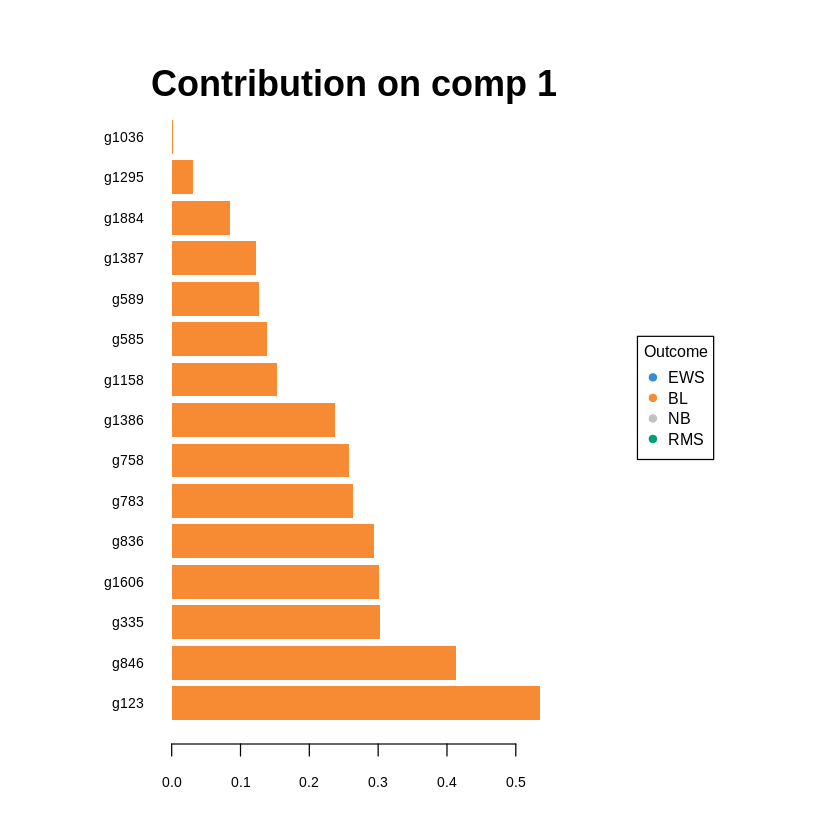


Call:
 perf.mixo_plsda(object = MyResult.plsda2, validation = "Mfold", folds = 3, nrepeat = 10, progressBar = FALSE) 

 Main numerical outputs: 
 -------------------- 
 Error rate (overall or BER) for each component and for each distance: see object$error.rate 
 Error rate per class, for each component and for each distance: see object$error.rate.class 
 Prediction values for each component: see object$predict 
 Classification of each sample, for each component and for each distance: see object$class 
 AUC values: see object$auc if auc = TRUE 

 Visualisation Functions: 
 -------------------- 
 plot 

[1]   5   6   7   8   9  10  20  30  40  50  60  70  80  90 100

[1] 3

comp1 comp2 comp3 
   50    40    40

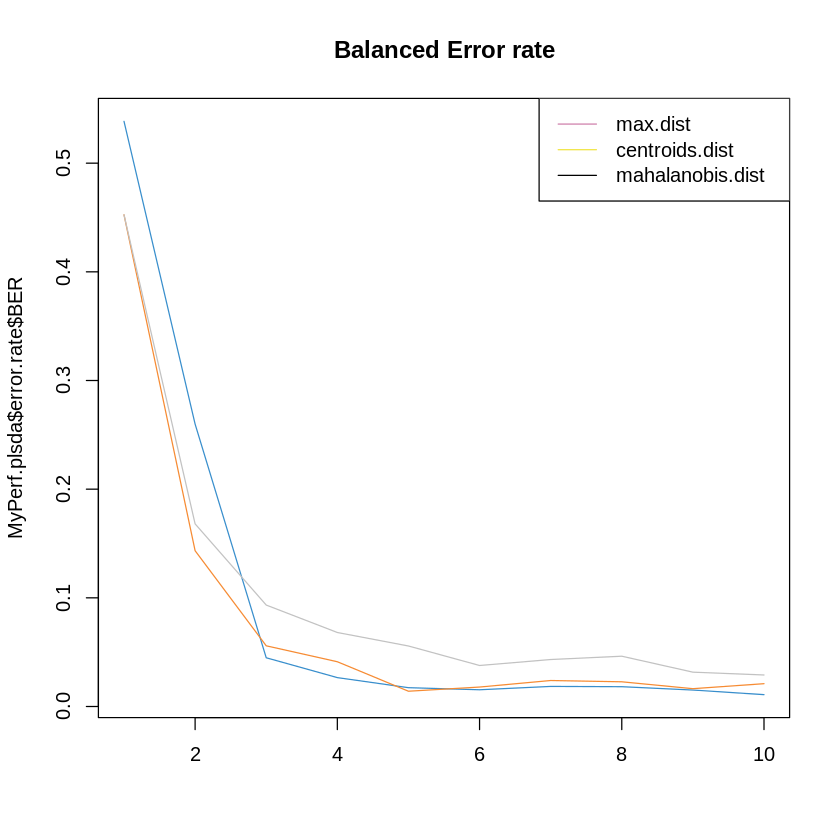

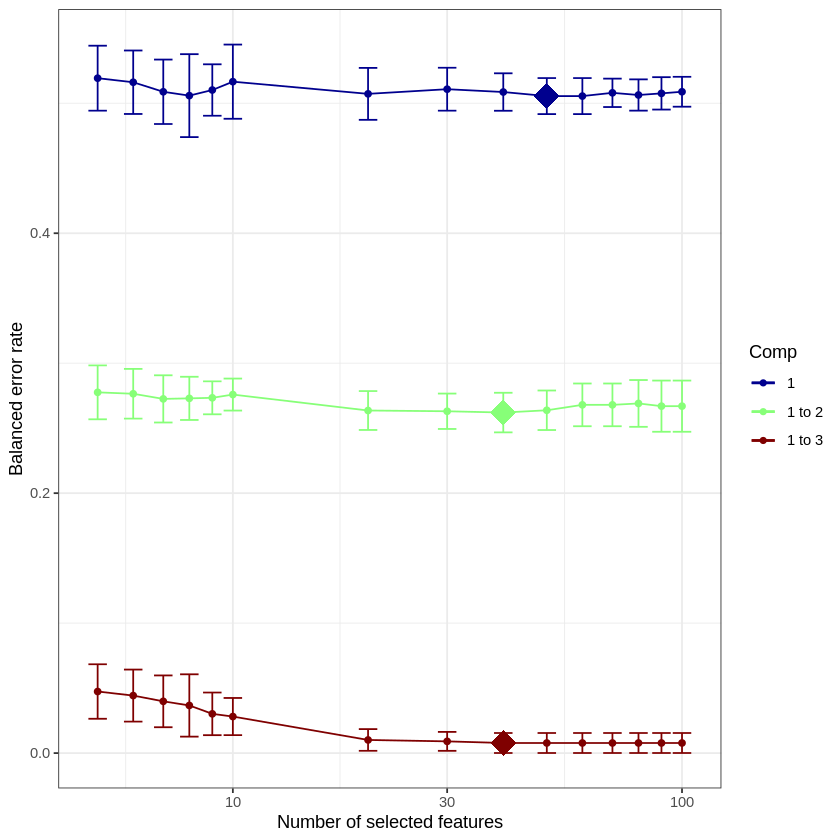

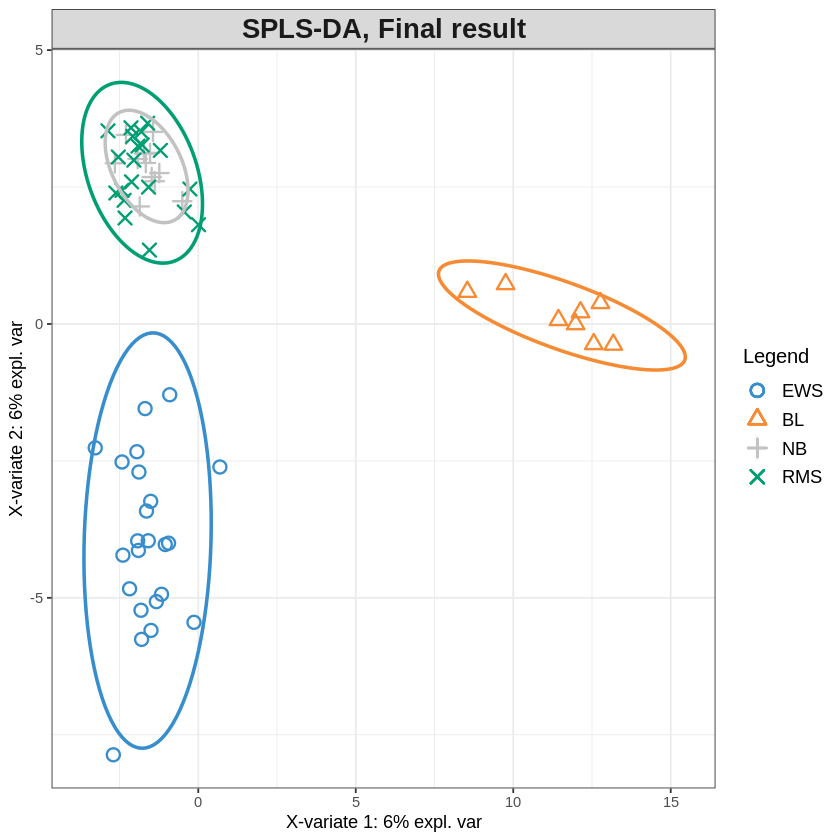

In [7]:
BiocManager::install("rgl")
# "Variable selection outputs"
library("rgl")
MyResult.splsda2 <- splsda(X,Y, ncomp=3, keepX=c(15,10,5))
# Selected variables are listed in the selectVar function:
selectVar(MyResult.splsda2, comp=1)$value
plotLoadings(MyResult.splsda2, contrib = 'max', method = 'mean')
plotIndiv(MyResult.splsda2, style="3d")
MyResult.plsda2 <- plsda(X,Y, ncomp=10)
set.seed(30) # for reproducibility in this vignette, otherwise increase nrepeat
MyPerf.plsda <- perf(MyResult.plsda2, validation = "Mfold", folds = 3, 
                  progressBar = FALSE, nrepeat = 10) # we suggest nrepeat = 50

# quick fix
matplot(MyPerf.plsda$error.rate$BER, type = 'l', lty = 1, 
        col = color.mixo(1:3), 
        main = 'Balanced Error rate')
legend('topright', 
       c('max.dist', 'centroids.dist', 'mahalanobis.dist'), 
       lty = 1,
       col = color.mixo(5:7))

MyPerf.plsda


list.keepX <- c(5:10,  seq(20, 100, 10))
list.keepX # to output the grid of values tested

set.seed(30) # for reproducbility in this vignette, otherwise increase nrepeat
tune.splsda.srbct <- tune.splsda(X, Y, ncomp = 3, # we suggest to push ncomp a bit more, e.g. 4
                                 validation = 'Mfold',
                                 folds = 3, dist = 'max.dist', progressBar = FALSE,
                                 measure = "BER", test.keepX = list.keepX,
                                 nrepeat = 10)   # we suggest nrepeat = 50
error <- tune.splsda.srbct$error.rate
ncomp <- tune.splsda.srbct$choice.ncomp$ncomp # optimal number of components based on t-tests on the error rate
ncomp

select.keepX <- tune.splsda.srbct$choice.keepX[1:ncomp]  # optimal number of variables to select
select.keepX

plot(tune.splsda.srbct, col = color.jet(ncomp))
MyResult.splsda.final <- splsda(X, Y, ncomp = ncomp, keepX = select.keepX)
plotIndiv(MyResult.splsda.final, ind.names = FALSE, legend=TRUE,
          ellipse = TRUE, title="SPLS-DA, Final result")

My next test is some singleCell RNASeq datasets
I will try to run some tutorials of recent works.
MUDAN (https://github.com/jefworks/MUDAN)



In [15]:
require(devtools)
BiocManager::install("sva") # I had issues installing the sva package whie installaing MUDAN hence I am reinstalling the "sva" to try MUDAN after that
library(sva)


Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'sva'

also installing the dependencies ‘bit’, ‘bit64’, ‘blob’, ‘DBI’, ‘bitops’, ‘formatR’, ‘IRanges’, ‘RSQLite’, ‘S4Vectors’, ‘XML’, ‘RCurl’, ‘lambda.r’, ‘futile.options’, ‘BiocGenerics’, ‘AnnotationDbi’, ‘annotate’, ‘Biobase’, ‘futile.logger’, ‘snow’, ‘genefilter’, ‘BiocParallel’, ‘limma’


Old packages: 'BH', 'broom', 'curl', 'DBI', 'DT', 'mime', 'rprojroot', 'vctrs',
  'xtable', 'foreign'

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.

Loading required package: genefilter


Attaching package: ‘genefilter’


The following object is masked from ‘package:MASS’:

    area


Loading required package: BiocParallel



In [16]:
devtools::install_github("JEFworks/MUDAN")
library(MUDAN)

irlba   (NA -> 2.3.3   ) [CRAN]
RANN    (NA -> 2.6.1   ) [CRAN]
Rtsne   (NA -> 0.15    ) [CRAN]
ROCR    (NA -> 1.0-7   ) [CRAN]
entropy (NA -> 1.2.1   ) [CRAN]
gplots  (NA -> 3.0.1.1 ) [CRAN]
gtools  (NA -> 3.8.1   ) [CRAN]
gdata   (NA -> 2.18.0  ) [CRAN]
caTools (NA -> 1.17.1.3) [CRAN]


Skipping 1 packages not available: sva

Installing 9 packages: irlba, RANN, Rtsne, ROCR, entropy, gplots, gtools, gdata, caTools

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmp4ngI3c/remotes7e2a8a63db/JEFworks-MUDAN-1954277/DESCRIPTION’
─  preparing ‘MUDAN’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘MUDAN_0.1.0.tar.gz’ (7.4s)
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix



In [21]:
# MUDAN features
# Testing only the first two modules from https://github.com/JEFworks/MUDAN/blob/master/vignette/demo.Rmd


## (1) Fast, flexible analysis code
data(pbmcA) ## load built in 10X pbmcA dataset
## downsample for testing purposes only
pbmcA <- as.matrix(pbmcA[, 1:2000]) 
start_time <- Sys.time()
## filter out poor genes and cells
cd <- cleanCounts(pbmcA, 
                  min.reads = 10, 
                  min.detected = 10, 
                  verbose=FALSE)
## CPM normalization
mat <- normalizeCounts(cd, 
                       verbose=FALSE) 
head(mat)


   [[ suppressing 2000 column names ‘frozen_pbmc_donor_a_AAACATTGCACTAG’, ‘frozen_pbmc_donor_a_AAACATTGGCTAAC’, ‘frozen_pbmc_donor_a_AAACATTGTAACCG’ ... ]]



6 x 2000 sparse Matrix of class "dgCMatrix"
                                                                             
LINC00115   .         .    .   .        .      . . 473.0369 . . .   .     . .
NOC2L       .         .    .   .        .      . .   .      . . .   .     . .
HES4        .         .    .   .        .      . .   .      . . .   .     . .
ISG15     863.9309 1100.11 .   .        .      . .   .      . . . 461.042 . .
C1orf159    .         .    .   .        .      . .   .      . . .   .     . .
TNFRSF18    .         .    . 607.9027 644.3299 . .   .      . . .   .     . .
                                                                        
LINC00115   .        .         .        .     . . . .   .      . . . . .
NOC2L       .        .         .        .     . . . . 527.4262 . . . . .
HES4        .        .         .        .     . . . .   .      . . . . .
ISG15     356.7606   .         .     1458.435 . . . .   .      . . . . .
C1orf159    .        .         .        .    

In [23]:
## variance normalize, identify overdispersed genes
matnorm.info <- normalizeVariance(mat, 
                                  details=TRUE, 
                                  verbose=FALSE) 
## log transform
matnorm <- log10(matnorm.info$mat+1) 
## 30 PCs on overdispersed genes
pcs <- getPcs(matnorm[matnorm.info$ods,], 
              nGenes=length(matnorm.info$ods), 
              nPcs=30, 
              verbose=FALSE) 
## get tSNE embedding on PCs
emb <- Rtsne::Rtsne(pcs, 
                    is_distance=FALSE, 
                    perplexity=30, 
                    num_threads=parallel::detectCores(), 
                    verbose=FALSE)$Y 
rownames(emb) <- rownames(pcs)
end_time <- Sys.time()
print(paste0("Analysis of ", 
             ncol(cd), " cells and ", 
             nrow(cd), " genes took ", 
             end_time - start_time, " seconds"))



[1] "Analysis of 2000 cells and 9632 genes took 2.13199925820033 seconds"


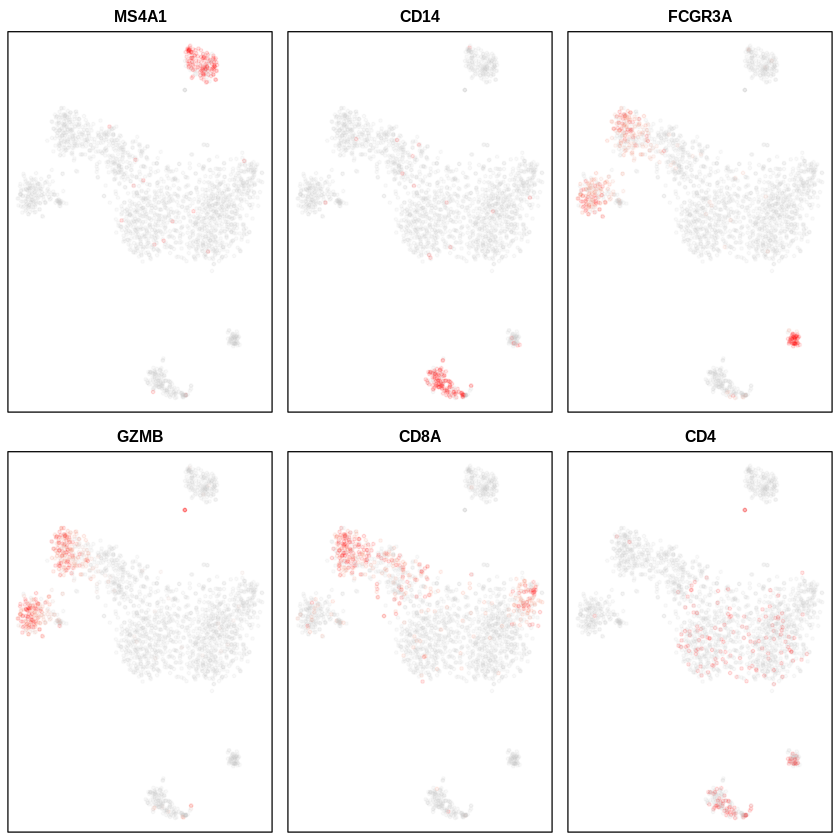

In [24]:
## Plotting expression marker genes.
marker.genes <- c('MS4A1', 'CD14', 'FCGR3A', 'GZMB', 'CD8A', 'CD4')
par(mfrow=c(2,3), mar=c(0.5,0.5,2,0.5))
invisible(lapply(marker.genes, function(g) {
  gcol <- cd[g,] ## plot a gene
  plotEmbedding(emb, 
                color=gcol, 
                mark.clusters=TRUE, 
                main=g, xlab=NA, ylab=NA, 
                verbose=FALSE, alpha=0.1) 
}))

[1] "Running differential expression with 13 clusters ... "
[1] "Summarizing results ... "


Warning message in plot.window(...):
“"trace" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"trace" is not a graphical parameter”
Warning message in title(...):
“"trace" is not a graphical parameter”


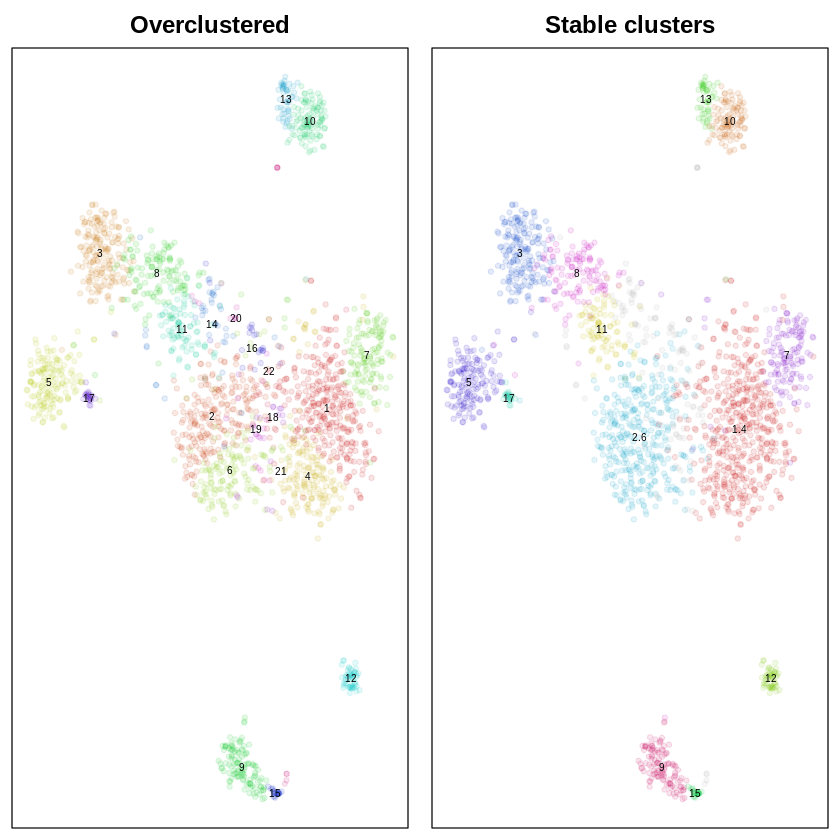

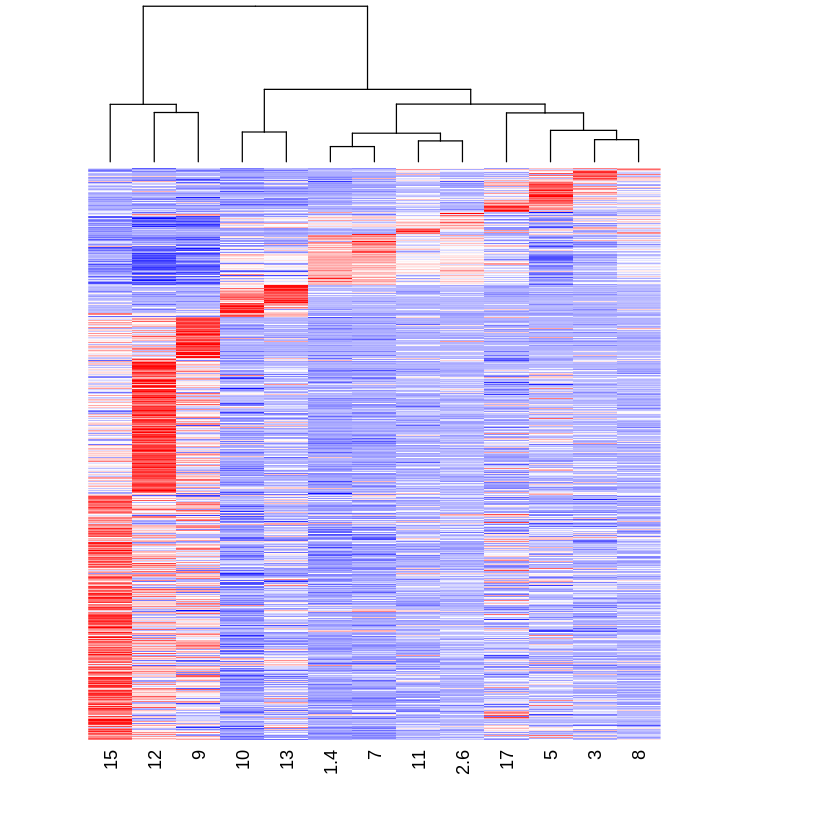

In [25]:
## (2) Graph-based subpopulation detection and subpopulation stability analysis

## graph-based community detection; over cluster with small k
com <- getComMembership(pcs, 
                        k=10, method=igraph::cluster_infomap, 
                        verbose=FALSE) 
## get stable clusters
stable <- getStableClusters(cd, com, matnorm, 
                            min.group.size=10, min.diff.genes=10, 
                            z.threshold=1.96, 
                            verbose=FALSE, plot=FALSE)
## plot
par(mfrow=c(1,2), mar=c(0.5,0.5,2,0.5))
plotEmbedding(emb, com, 
              main='Overclustered', xlab=NA, ylab=NA, 
              mark.clusters=TRUE, alpha=0.1, mark.cluster.cex=0.5,
              verbose=FALSE) ## plot
plotEmbedding(emb, groups=stable$com, 
              main='Stable clusters', xlab=NA, ylab=NA, 
              mark.clusters=TRUE, alpha=0.1, mark.cluster.cex=0.5,
              verbose=FALSE) 

## plot significant differential genes as heatmap
dg <- getDifferentialGenes(cd, stable$com)
dg <- dg[stable$hc$labels[stable$hc$order]]
dg.sig <- unlist(lapply(dg, function(x) {
  x <- x[x$Z>1.96,] ## significant z-score
  x <- x[x$highest,] ## must be highest in this group (optimal markers)
  rownames(x)
}))
dg.sig <- intersect(dg.sig, rownames(stable$mat.summary))
m <- stable$mat.summary[dg.sig,]
heatmap(m, 
        Rowv=NA, Colv=as.dendrogram(stable$hc),
        col=colorRampPalette(c("blue", "white", "red"))(100),
        scale="row", trace="none", labRow=NA)